In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Advanced House Price Prediction.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.duplicated().sum()

0

In [4]:
df.shape

(1460, 81)

In [5]:
for column in df.columns:
    print(df[column].value_counts())
    print('----------------------------------------')

Id
1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: count, Length: 1460, dtype: int64
----------------------------------------
MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64
----------------------------------------
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
----------------------------------------
LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64
----------------------------------------
LotArea
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: count, Length: 1073, dtype

In [6]:
df.drop(columns=['Id', 'Street', 'Alley', 'Utilities', 'Condition2', 'RoofMatl', 'BsmtFinSF2', 'Heating', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal'], inplace=True)

In [7]:
df.shape

(1460, 64)

In [8]:
for column in ['MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']:
    print(column, ':', (df[column] == 0).sum())

MasVnrArea : 861
BsmtFinSF1 : 467
BsmtUnfSF : 118
TotalBsmtSF : 37
2ndFlrSF : 829
GarageArea : 81
WoodDeckSF : 761
OpenPorchSF : 656


In [9]:
def convert_zero_to_NaN(value):
    if value in [0, 0.0]:
        return np.nan
    else:
        return value
    
df[['MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']] = df[['MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']].map(convert_zero_to_NaN)

In [10]:
df[['MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']].isnull().sum()

MasVnrArea     869
BsmtFinSF1     467
BsmtUnfSF      118
TotalBsmtSF     37
2ndFlrSF       829
GarageArea      81
WoodDeckSF     761
OpenPorchSF    656
dtype: int64

In [11]:
null_values_columns = []

for column in df.columns:
    null_values = df[column].isnull().sum()
    if null_values > 0:
        null_values_columns.append(column)
        print(column, '-', null_values)

LotFrontage - 259
MasVnrType - 872
MasVnrArea - 869
BsmtQual - 37
BsmtCond - 37
BsmtExposure - 38
BsmtFinType1 - 37
BsmtFinSF1 - 467
BsmtFinType2 - 38
BsmtUnfSF - 118
TotalBsmtSF - 37
Electrical - 1
2ndFlrSF - 829
FireplaceQu - 690
GarageType - 81
GarageYrBlt - 81
GarageFinish - 81
GarageArea - 81
GarageQual - 81
GarageCond - 81
WoodDeckSF - 761
OpenPorchSF - 656


In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

categorical_columns = df.select_dtypes(include='object').columns
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [13]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)
df[null_values_columns] = knn_imputer.fit_transform(df[null_values_columns])

In [14]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 64, dtype: int64

In [15]:
numerical_columns = df.select_dtypes(include='number').columns[:-1]

n_cols = 5
n_rows = 13

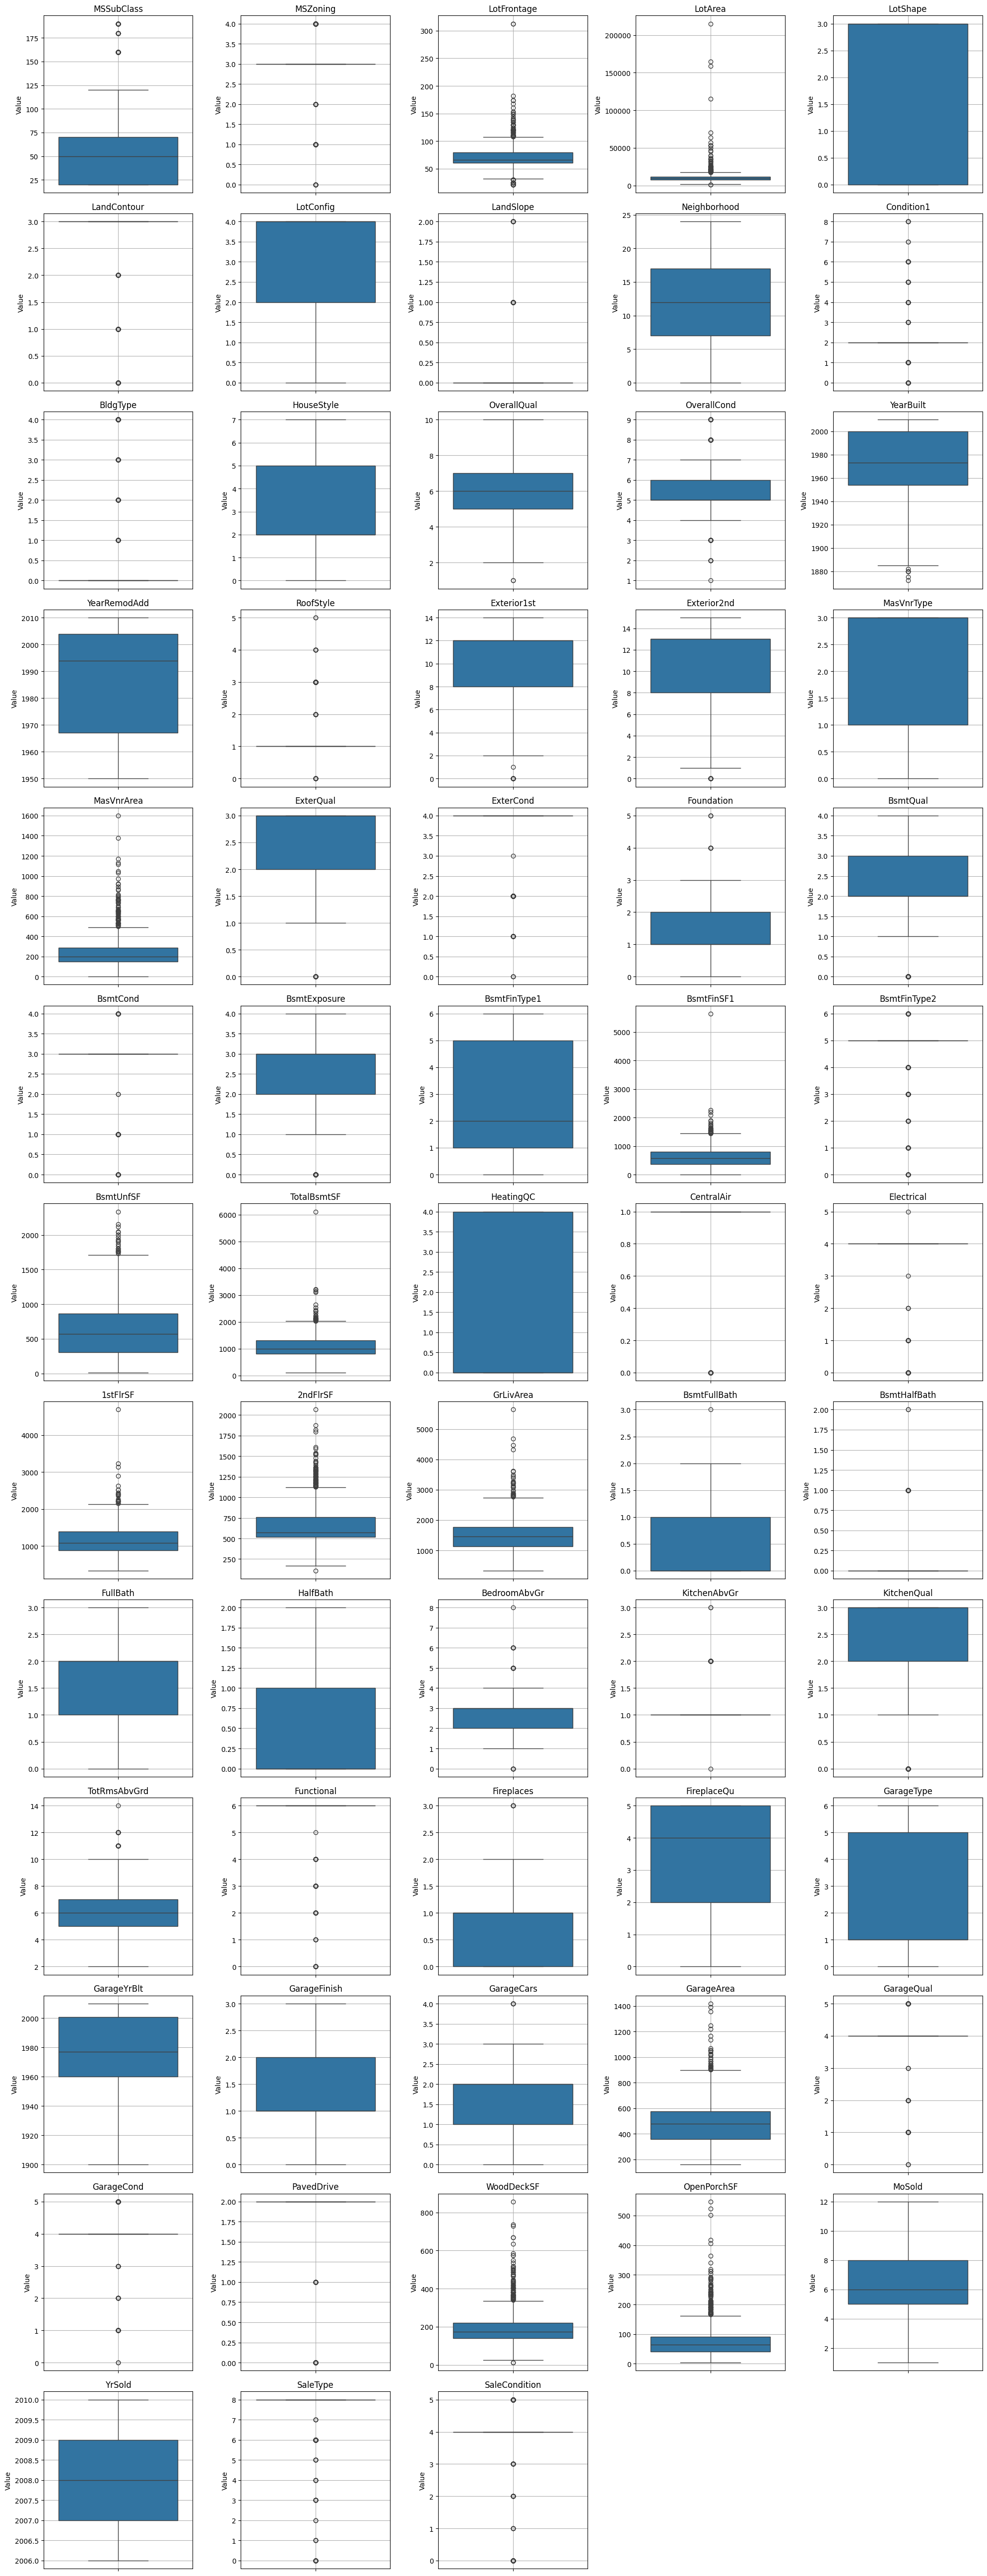

In [16]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
axes = axes.flatten()

for index, column in enumerate(numerical_columns):
    sns.boxplot(data=df[column], ax=axes[index])
    axes[index].set_title(column)
    axes[index].set_ylabel('Value')
    axes[index].grid(True)
    
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

In [17]:
for column in numerical_columns:
    data = df[column]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    LowerBound = Q1 - 1.5 * IQR
    UpperBound = Q3 + 1.5 * IQR
    outliers_data = (data < LowerBound) | (data > UpperBound)
    print(f'{column} : {outliers_data.sum()} --> {(outliers_data.sum() / 8128) * 100:.2f}%')

MSSubClass : 103 --> 1.27%
MSZoning : 309 --> 3.80%
LotFrontage : 106 --> 1.30%
LotArea : 69 --> 0.85%
LotShape : 0 --> 0.00%
LandContour : 149 --> 1.83%
LotConfig : 0 --> 0.00%
LandSlope : 78 --> 0.96%
Neighborhood : 0 --> 0.00%
Condition1 : 200 --> 2.46%
BldgType : 240 --> 2.95%
HouseStyle : 0 --> 0.00%
OverallQual : 2 --> 0.02%
OverallCond : 125 --> 1.54%
YearBuilt : 7 --> 0.09%
YearRemodAdd : 0 --> 0.00%
RoofStyle : 319 --> 3.92%
Exterior1st : 21 --> 0.26%
Exterior2nd : 20 --> 0.25%
MasVnrType : 0 --> 0.00%
MasVnrArea : 73 --> 0.90%
ExterQual : 52 --> 0.64%
ExterCond : 178 --> 2.19%
Foundation : 9 --> 0.11%
BsmtQual : 121 --> 1.49%
BsmtCond : 149 --> 1.83%
BsmtExposure : 221 --> 2.72%
BsmtFinType1 : 0 --> 0.00%
BsmtFinSF1 : 29 --> 0.36%
BsmtFinType2 : 204 --> 2.51%
BsmtUnfSF : 23 --> 0.28%
TotalBsmtSF : 27 --> 0.33%
HeatingQC : 0 --> 0.00%
CentralAir : 95 --> 1.17%
Electrical : 126 --> 1.55%
1stFlrSF : 20 --> 0.25%
2ndFlrSF : 80 --> 0.98%
GrLivArea : 31 --> 0.38%
BsmtFullBath : 1 -

In [18]:
constant_value_columns = ['MSZoning', 'LandContour', 'LandSlope', 'Condition1', 'BldgType', 'RoofStyle', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'CentralAir', 'Electrical', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

columns_to_cap = [col for col in numerical_columns if col not in constant_value_columns]

data = df[columns_to_cap]
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
LowerBound = Q1 - 1.5 * IQR
UpperBound = Q3 + 1.5 * IQR

df[columns_to_cap] = df[columns_to_cap].clip(lower=LowerBound, upper=UpperBound, axis=1)
# df = df[(df[numerical_columns] >= LowerBound) | (df[numerical_columns <= UpperBound])]

In [19]:
df.shape

(1460, 64)

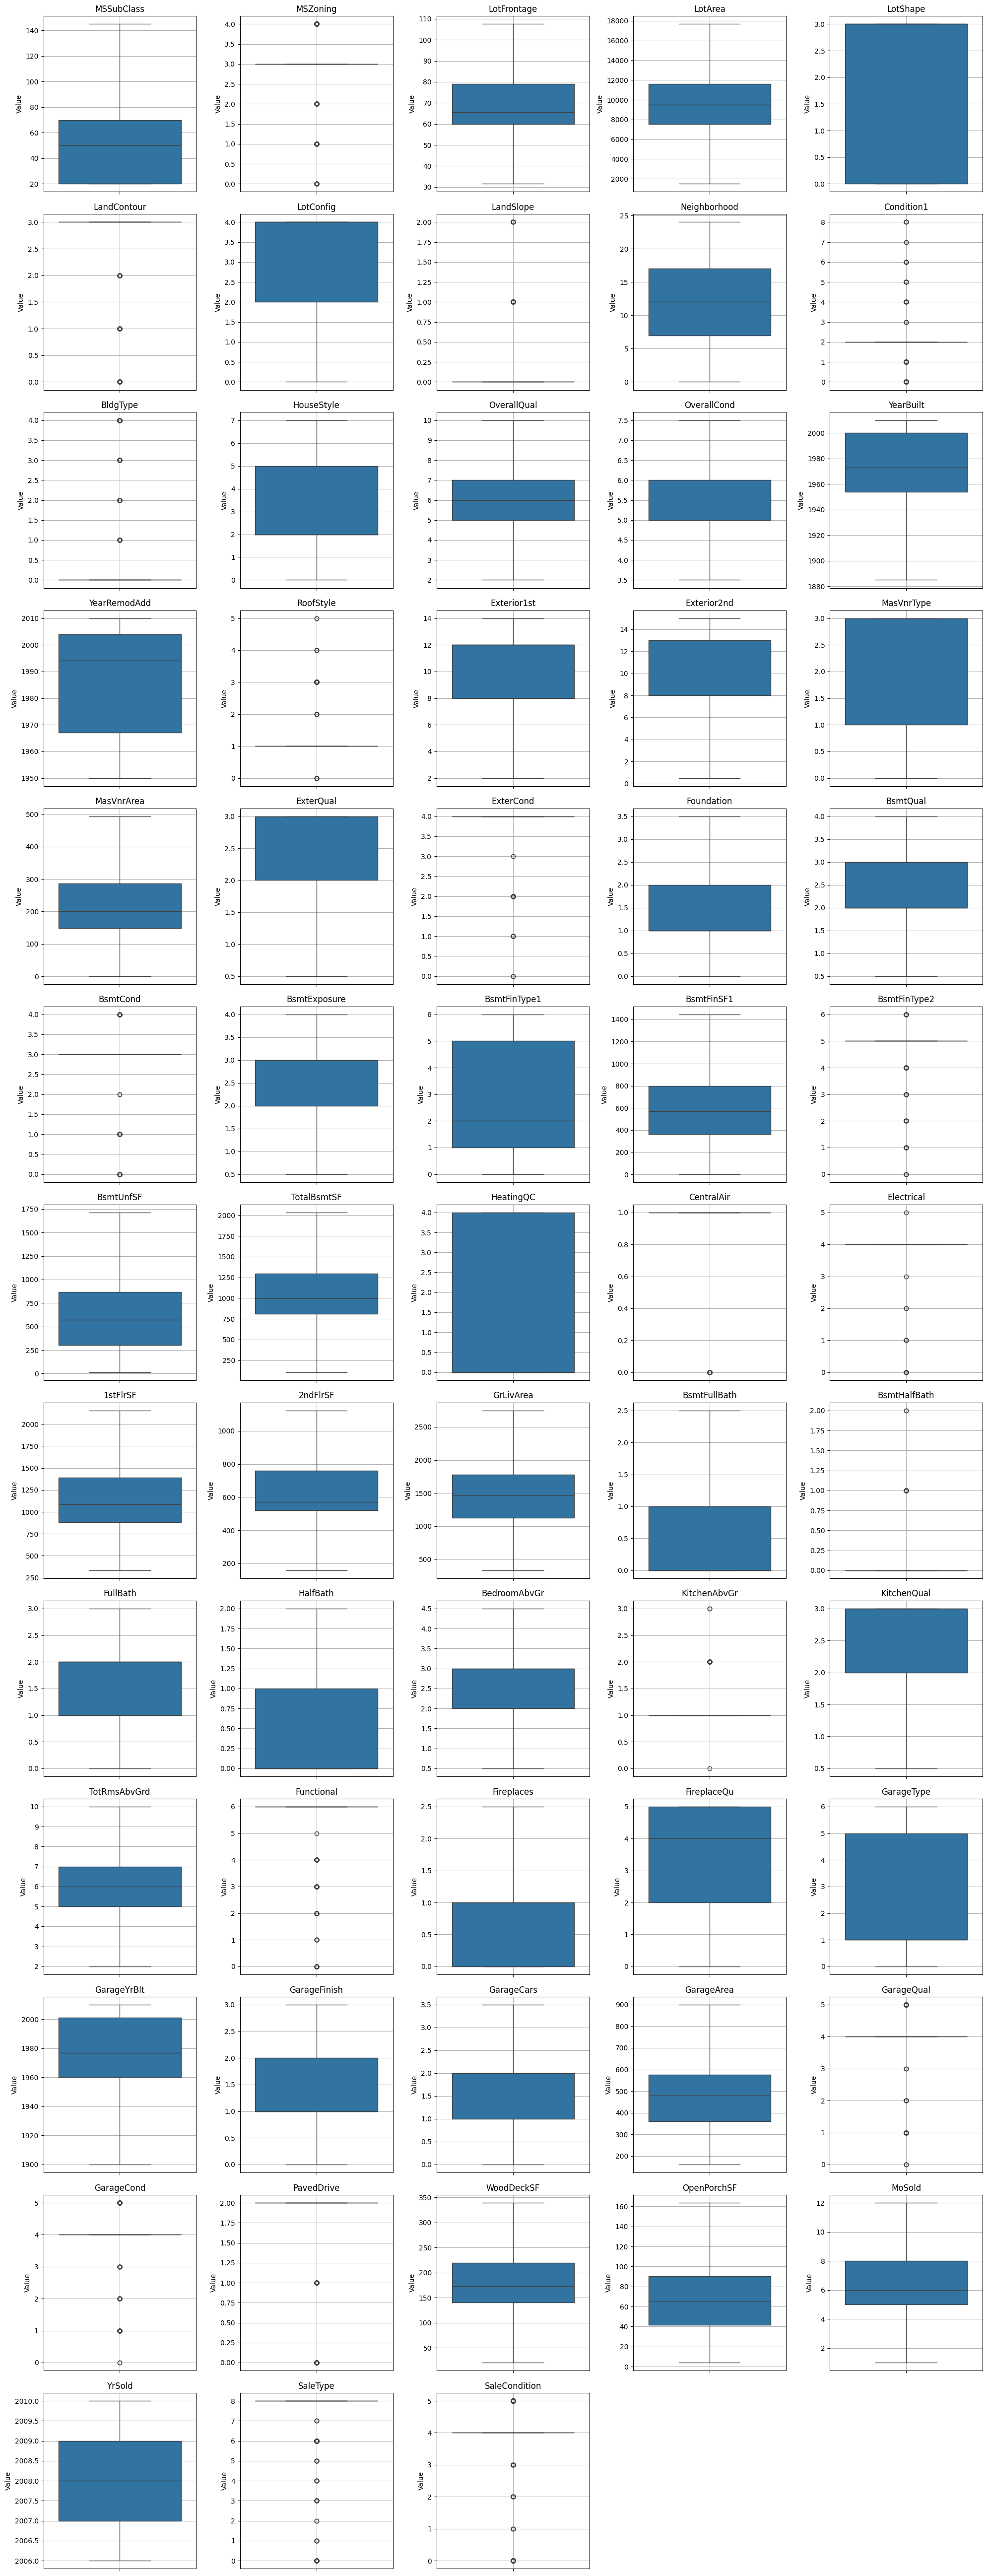

In [20]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
axes = axes.flatten()

for index, column in enumerate(numerical_columns):
    sns.boxplot(data=df[column], ax=axes[index])
    axes[index].set_title(column)
    axes[index].set_ylabel('Value')
    axes[index].grid(True)
    
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

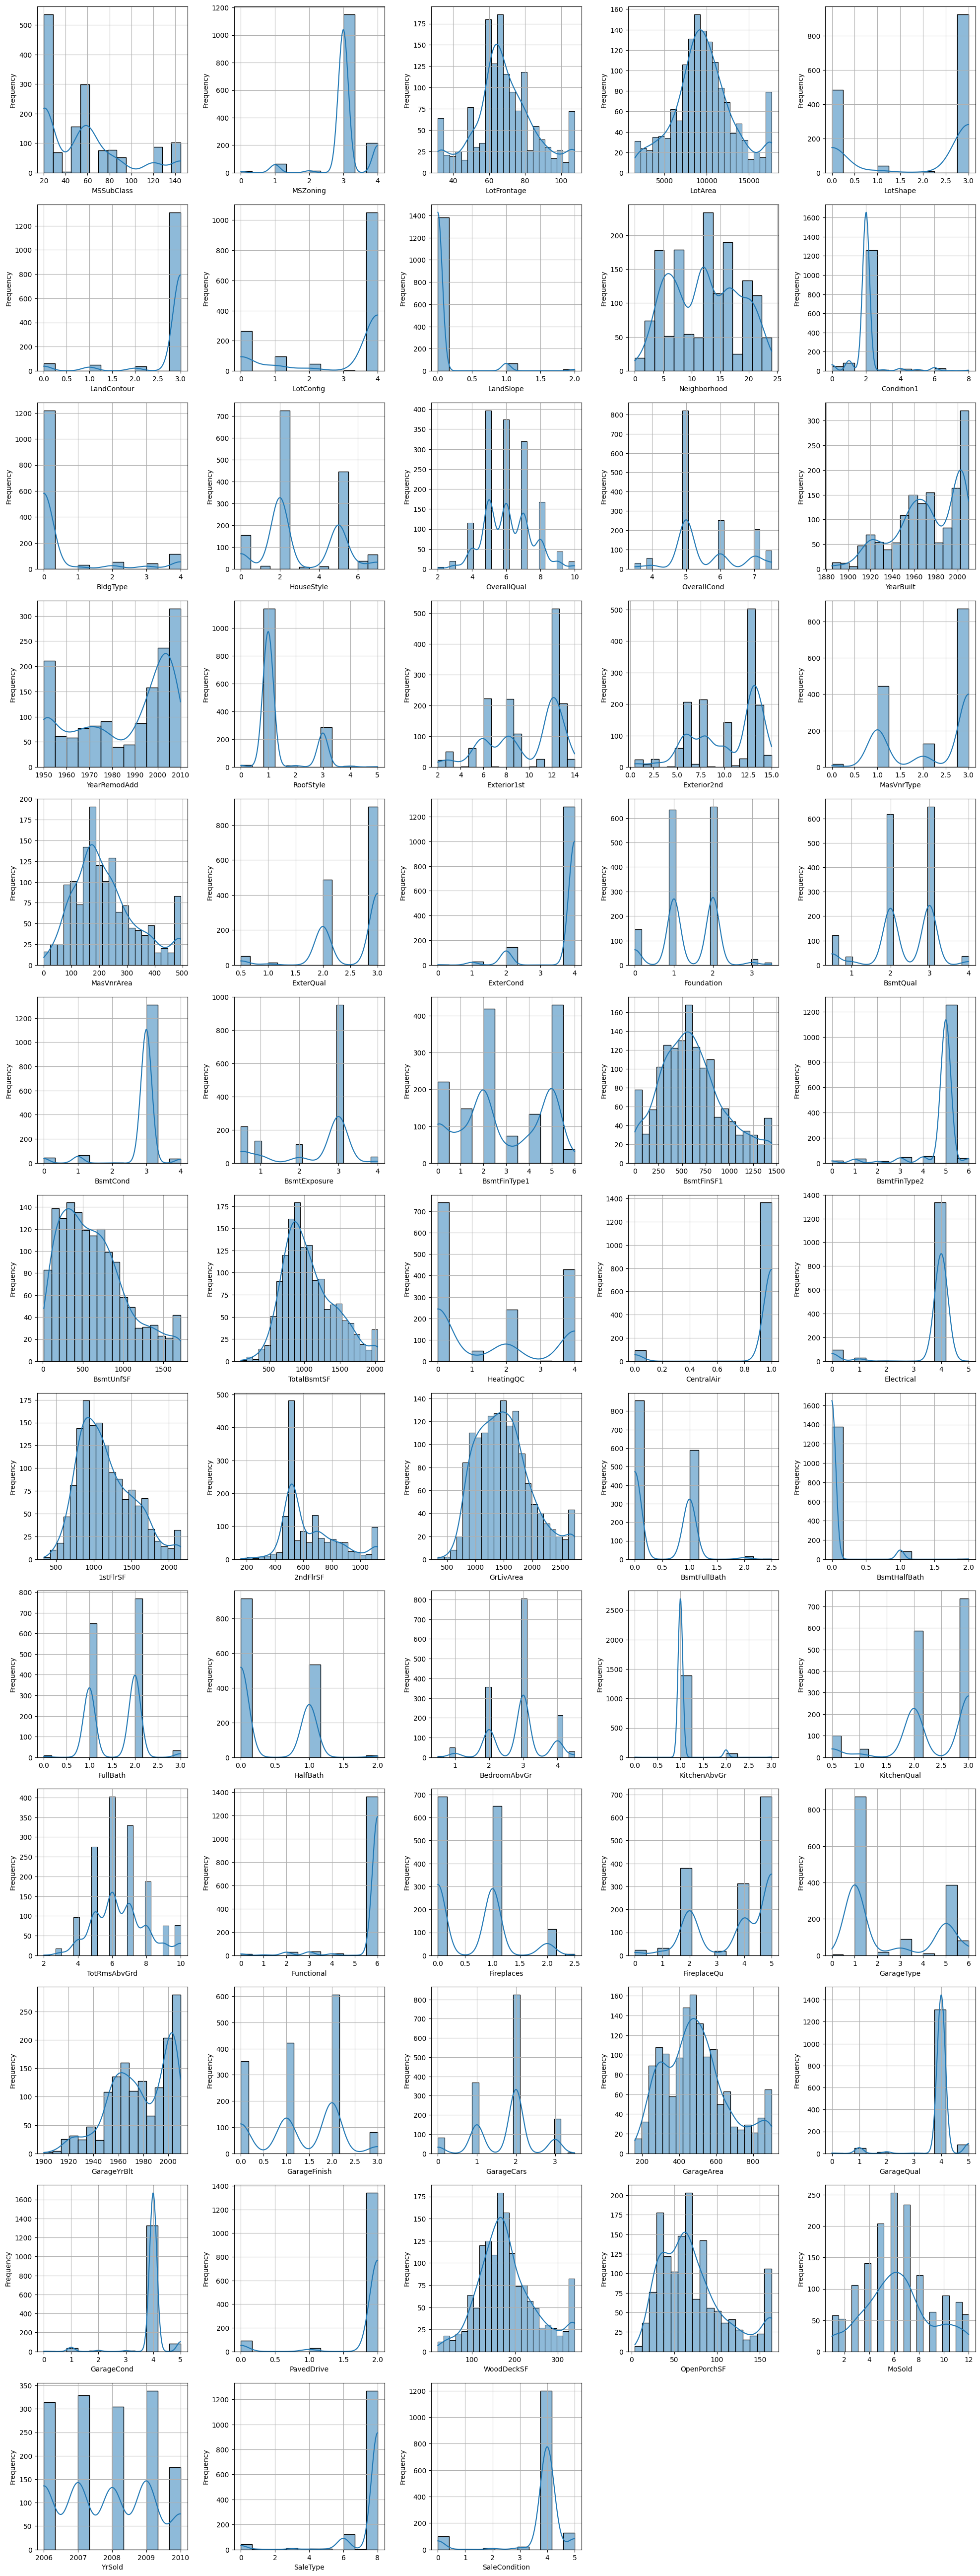

In [21]:
fig, axes =plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
axes = axes.flatten()

for index, column in enumerate(numerical_columns):
    sns.histplot(data=df[column], ax=axes[index], kde=True)
    axes[index].set_ylabel('Frequency')
    axes[index].grid(True)
    
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()  

In [22]:
# from sklearn.preprocessing import QuantileTransformer
# qt = QuantileTransformer(output_distribution='normal')
# df[numerical_columns] = qt.fit_transform(df[numerical_columns])

# from sklearn.preprocessing import PowerTransformer
# pt = PowerTransformer(method='yeo-johnson')
# df[numerical_columns] = pt.fit_transform(df[numerical_columns])

In [23]:
# fig, axes =plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
# axes = axes.flatten()

# for index, column in enumerate(numerical_columns):
#     sns.histplot(data=df[column], ax=axes[index], kde=True)
#     axes[index].set_ylabel('Frequency')
#     axes[index].grid(True)
    
# for i in range(len(numerical_columns), len(axes)):
#     fig.delaxes(axes[i])
    
# plt.tight_layout()
# plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df[numerical_columns] = std_scaler.fit_transform(df[numerical_columns])

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.131067,-0.045532,-0.204933,-0.333244,0.750731,0.314667,0.604670,-0.225716,-1.206215,-0.036289,...,0.11211,0.0689,0.289745,-0.341823,-0.296921,-1.599111,0.138777,0.313867,0.208502,208500
1,-0.935733,-0.045532,0.659870,-0.013189,0.750731,0.314667,-0.628316,-0.225716,1.954302,-1.188074,...,0.11211,0.0689,0.289745,1.699421,-1.068676,-0.489110,-0.614439,0.313867,0.208502,181500
2,0.131067,-0.045532,-0.031973,0.446022,-1.378933,0.314667,0.604670,-0.225716,-1.206215,-0.036289,...,0.11211,0.0689,0.289745,1.043481,-0.780328,0.990891,0.138777,0.313867,0.208502,223500
3,0.397766,-0.045532,-0.493201,-0.027104,-1.378933,0.314667,-1.861302,-0.225716,-1.039872,-0.036289,...,0.11211,0.0689,0.289745,-0.914547,-0.958425,-1.599111,-1.367655,0.313867,-3.426284,140000
4,0.131067,-0.045532,0.890484,1.283733,-1.378933,0.314667,-0.628316,-0.225716,0.457215,-0.036289,...,0.11211,0.0689,0.289745,0.142789,0.288255,2.100892,0.138777,0.313867,0.208502,250000


In [25]:
df.shape

(1460, 64)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = df.iloc[:, :63]
Y = df.iloc[:, 63]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=101)

In [27]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

Y_pred_train = lr.predict(X_train)
Y_pred_test = lr.predict(X_test)

print('Train Accuracy :', r2_score(Y_train, Y_pred_train))
print('Test Accuracy :', r2_score(Y_test, Y_pred_test))

Train Accuracy : 0.8679889843221206
Test Accuracy : 0.814360235594595
